<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/gender_detect_using_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cvlib

     |████████████████████████████████| 10.1MB 2.6MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044204 sha256=f6d6a0460a9e3eea051363668f0a7aff052ae9edcaafa3b2cf99f0862ce68d9a
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12074 sha256=c2e3e99b2cad25b5a63228cc4e113d7b3de7d78fb45e3654519ea680e9a35bb8
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [2]:
import cv2

In [38]:
from google.colab import files
files.upload()

Saving 103488870_3501023739925425_3721017189503802086_n.jpg to 103488870_3501023739925425_3721017189503802086_n.jpg


{'103488870_3501023739925425_3721017189503802086_n.jpg': b'\xff\xd8\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [39]:
img = cv2.imread("/content/quyen.jpg")

In [40]:
import cvlib as cv
faces, confidences = cv.detect_face(img) 

In [35]:
import os
import numpy as np

In [44]:
padding = 20
for f in faces:

    (startX,startY) = max(0, f[0]-padding), max(0, f[1]-padding)
    (endX,endY) = min(img.shape[1]-1, f[2]+padding), min(img.shape[0]-1, f[3]+padding)
    
    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)

    face_crop = np.copy(img[startY:endY, startX:endX])

    # apply gender detection
    (label, confidence) = cv.detect_gender(face_crop)

    print(confidence)
    print(label)

    idx = np.argmax(confidence)
    label = label[idx]

    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

[0.9795985  0.02040141]
['male', 'female']


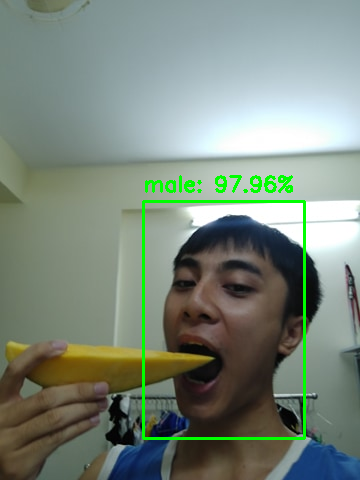

In [42]:
from google.colab.patches import cv2_imshow
cv2_imshow( img)